In [1]:
import tensorflow as tf
import numpy as np

In [2]:
width=224
height=224
batch_size=32
data_dir="dataset/"

In [3]:
training=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [4]:
validation=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [5]:
classes=training.class_names
classes

['with_mask', 'without_mask']

In [6]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

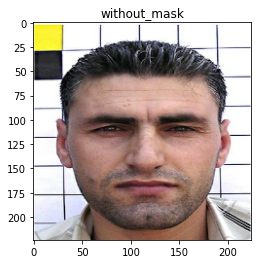

In [7]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
model=MobileNetV2(weights='imagenet')

In [10]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [11]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [12]:
face_mask_detection=model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3


c:\Users\Ayush Gupta\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


81/81 [==============================] - 419s 5s/step - loss: 0.2474 - accuracy: 0.9594 - val_loss: 8.1319 - val_accuracy: 0.4959
Epoch 2/3
81/81 [==============================] - 409s 5s/step - loss: 0.0201 - accuracy: 0.9923 - val_loss: 0.7164 - val_accuracy: 0.9350
Epoch 3/3
81/81 [==============================] - 413s 5s/step - loss: 0.0405 - accuracy: 0.9892 - val_loss: 0.8639 - val_accuracy: 0.9042


In [24]:
img=tf.keras.preprocessing.image.load_img('Screenshot 2021-08-25 100229.png',target_size=(height,width))
image_array=tf.keras.preprocessing.image.img_to_array(img)
image_array=tf.expand_dims(image_array,0)
image_array.shape

TensorShape([1, 224, 224, 3])

In [25]:
predictions=model.predict(image_array)
score=tf.nn.softmax(predictions[0])

In [26]:
import numpy
print(classes[numpy.argmax(score)])

without_mask


In [35]:
img=tf.keras.preprocessing.image.load_img('dataset/with_mask/0_0_0 copy 11.jpg',target_size=(height,width))
image_array=tf.keras.preprocessing.image.img_to_array(img)
image_array=tf.expand_dims(image_array,0)
image_array.shape

TensorShape([1, 224, 224, 3])

In [36]:
predictions=model.predict(image_array)
score=tf.nn.softmax(predictions[0])

In [37]:
print(classes[numpy.argmax(score)])

IndexError: list index out of range

In [33]:
img=tf.keras.preprocessing.image.load_img('dataset/without_mask/0_0_chenhe_0007.jpg',target_size=(height,width))
image_array=tf.keras.preprocessing.image.img_to_array(img)
image_array=tf.expand_dims(image_array,0)

predictions=model.predict(image_array)
score=tf.nn.softmax(predictions[0])

print(classes[numpy.argmax(score)])

IndexError: list index out of range

In [38]:
model.save('face_mask_detection.model',save_format="h5")